In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist,cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Print shapes of the data
print(f'Training data shape: {X_train.shape}')
print(f'Test data shape: {X_test.shape}')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [ ]:
# Flatten the 28x28 images into vectors of size 784
X_train = X_train.reshape((X_train.shape[0], 28 * 28)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28 * 28)).astype('float32')

# Normalize the pixel values to [0, 1]
X_train /= 255.0
X_test /= 255.0

In [ ]:
# Build the MLP model
model = Sequential()

# Add input layer and a hidden layer
model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))  # Input size is 784 (28x28 flattened)
model.add(Dense(256, activation='relu'))  # Hidden layer
model.add(Dense(128, activation='relu'))  # Hidden layer
model.add(Dense(10, activation='softmax'))  # Output layer (10 units for 10 classes)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Convert target variables to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
trained = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/50
444/469 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8678 - loss: 0.4487

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(trained.history['accuracy'], label='Training accuracy')
plt.plot(trained.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Print shapes of the data
print(f'Training data shape: {X_train.shape}')
print(f'Test data shape: {X_test.shape}')

# Flatten the 28x28 images into vectors of size 784
X_train = X_train.reshape((X_train.shape[0], 28 * 28)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28 * 28)).astype('float32')

# Normalize the pixel values to [0, 1]
X_train /= 255.0
X_test /= 255.0

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1) # Get the predicted class labels

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted') # Use 'weighted' for multiclass
recall = recall_score(y_test, y_pred, average='weighted') # Use 'weighted' for multiclass
f1 = f1_score(y_test, y_pred, average='weighted') # Use 'weighted' for multiclass

# Print the classification metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Print the classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

In [ ]:
model2 = Sequential()

# Add input layer and a hidden layer
model2.add(Dense(512, activation='sigmoid', input_shape=(28 * 28,)))  # Input size is 784 (28x28 flattened)
model2.add(Dense(256, activation='sigmoid'))  # Hidden layer
model2.add(Dense(128, activation='sigmoid'))  # Hidden layer
model2.add(Dense(256, activation='sigmoid'))  # Hidden layer
model2.add(Dense(512, activation='sigmoid'))  # Hidden layer
model2.add(Dense(784, activation='sigmoid')) # Output layer - changed to 784 units to match target shape

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 784)                 │         402,192 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,132,944 (4.32 MB)

 Trainable params: 1,132,944 (4.32 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mse'])

# Train the model
trained = model2.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test, X_test))

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.2838 - mse: 0.0736 - val_loss: 0.2361 - val_mse: 0.0590
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2259 - mse: 0.0554 - val_loss: 0.1946 - val_mse: 0.0452
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1903 - mse: 0.0435 - val_loss: 0.1801 - val_mse: 0.0398
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1765 - mse: 0.0384 - val_loss: 0.1652 - val_mse: 0.0345
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1636 - mse: 0.0339 - val_loss: 0.1556 - val_mse: 0.0312
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1521 - mse: 0.0299 - val_loss: 0.1440 - val_mse: 0.0272
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1426 - mse: 0.0266 - val_loss: 0.1372 - val_mse: 0.0248
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1357 - mse: 0.0242 - val_loss: 0.1306 - val_mse: 0.0226
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - lo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


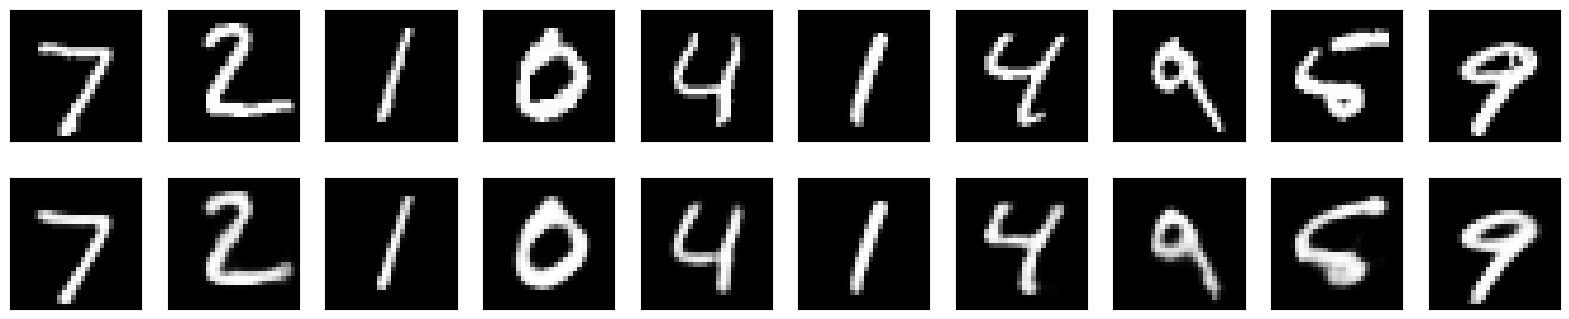

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Reshape to (1, 28 * 28) to represent a single sample in a batch
    decoded_imgs = model2.predict(X_test[i].reshape(1, 28 * 28))

    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    # Access the first element of decoded_imgs since it's a batch of one
    plt.imshow(decoded_imgs[0].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()